In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
# Q1 : 생존자와 사망자 수는?
titanic['survived'].value_counts().to_frame()

# 생존자:342명, 사망자:549명

,survived
0,549
1,342


In [22]:
# Q2 : 존자의 성비는?

survived = titanic.query('survived == 1')
    # 파생변수로 따로 저장
survived['sex'].value_counts().to_frame()

# 109 : 233

,sex
female,233
male,109


In [9]:
#Q3 :가장 많이 탑승한 탑승객의 연령은?
titanic['age'].value_counts().to_frame()
# 24

,age
24.00,30
22.00,27
18.00,26
19.00,25
28.00,25
...,...
36.50,1
55.50,1
0.92,1
23.50,1


In [10]:
# Q4: 탑승객이 가장 많이 탑승한 승선지는?
titanic['embarked'].value_counts().to_frame()
# Southampton

,embarked
S,644
C,168
Q,77


In [12]:
# Q5: 총 가족 구성원의 수가 4명 이상인 탑승객의 수는?

titanic['tot_family'] = titanic['sibsp'] + titanic['parch']
titanic_family = titanic.query('tot_family >= 4')
    # 4명 이상인 탑승객 데이터 새로 저장
len(titanic_family)
    
# 62명

62

In [13]:
# Q6:평균 요금이 가장 높은 승선지는?

titanic.groupby('embarked').agg(fare_mean = ('fare','mean'))
    # 각 승선지 별 요금의 평균값 계산
    
# Cherbourg

,fare_mean
embarked,
C,59.954144
Q,13.276030
S,27.079812


In [14]:
# Q7: 혼자 탑승한 승객의 생존률은?

titanic.groupby('alone')['survived'].sum().to_frame() / titanic.groupby('alone')['survived'].count().to_frame() * 100
    # alone을 기준으로 생존자 수 / 전체 수 생존률

# 30.35%

,survived
alone,
False,50.564972
True,30.353818


In [15]:
# Q8 :좌석등급에 따라 요금의 차이 추출
titanic.groupby('class').agg(mean_fare = ('fare','mean'))

,mean_fare
class,
First,84.154687
Second,20.662183
Third,13.675550


In [20]:
# Q9 : 20살 이하중에 혼자 온사람 추출
titanic_2= titanic.assign(alone = np.where(titanic['alone']== 'True',1,0))
titanic_2.query('age <= 20 & alone == 1')[['age','alone']]
# 없다.

,age,alone


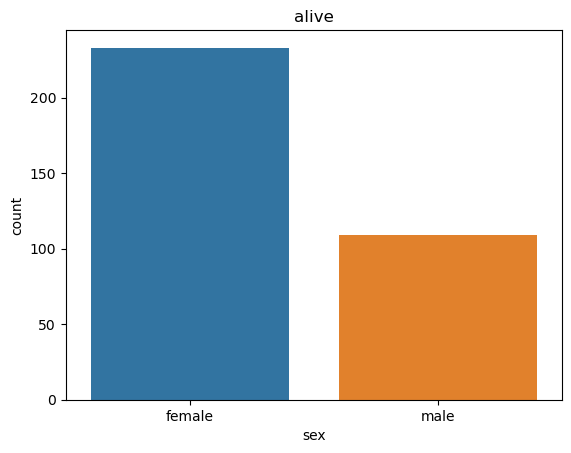

In [21]:
# Q10: 남자와 여자 중 생존자는 누가 더 많을까(표로 추출)
titanic_1 = titanic[titanic['alive']=='yes']
sns.countplot(x="sex", data=titanic_1)
plt.title("alive")
plt.show()

# 여자